Data Visualization III
Download the Iris flower dataset or any other dataset into a
DataFrame. (e.g., https://archive.ics.uci.edu/ml/datasets/Iris).
Scan the dataset and give the inference as:
1. List down the features and their types (e.g., numeric,
nominal) available in the dataset.
2. Create a histogram for each feature in the dataset to
illustrate the feature distributions.
3. Create a box plot for each feature in the dataset.
4. Compare distributions and identify outliers.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("Iris.csv")
df.head()
df.dtypes

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

### 1. **Histograms**
Histograms show the distribution of a numerical feature. For each feature, we plot a histogram with a Kernel Density Estimate (KDE) to illustrate the distribution more clearly.
#### Inference:
- The histograms help us understand the distribution of features like `SepalLengthCm`, `SepalWidthCm`, etc.
- Features like `PetalLengthCm` and `PetalWidthCm` have a relatively normal distribution.
- `SepalWidthCm` appears to have a skewed distribution.

### 2. **Boxplots**
Boxplots provide a summary of the data distribution, including the **median**, **quartiles**, and **outliers**. Each feature is visualized across different species to observe any differences between species.
#### Inference:
- The boxplots reveal how each species differs in terms of the feature distribution.
- Outliers are visible in the `SepalLengthCm` and `PetalWidthCm` for some species.
- The width of the boxes and the median lines help us compare species and feature variations.

### 3. **KDE Plots**
Kernel Density Estimate (KDE) plots are used to visualize the probability density of a continuous feature. Unlike histograms, KDE plots are smoother and help better understand the underlying distribution.
#### Inference:
- KDE plots show the probability density for each feature.
- They provide a smoother representation of the data distribution compared to histograms.

### 4. **Identifying Outliers**

#### Using Z-scores:
Z-scores help us identify outliers by measuring how far a data point is from the mean in terms of standard deviations. Typically, data points with a Z-score greater than 3 or less than -3 are considered outliers.
#### Inference:
- Using Z-scores, we can identify rows with outliers (for instance, row 15 has an outlier in `SepalLengthCm` and `PetalWidthCm`).

#### Using IQR (Interquartile Range):
Another common method for identifying outliers is using the IQR, which defines outliers as points beyond **1.5 times the IQR** from the first and third quartiles.
#### Inference:
- Outliers are identified based on the IQR method, which gives us a list of rows that have extreme values.
- For example, the rows with `SepalWidthCm` values of 2.0 or lower are identified as outliers.

### 5. **Removing Outliers**
Once outliers are identified using Z-scores or IQR, they can be removed from the dataset for cleaner analysis. Here’s how we can remove the rows with outliers based on Z-scores:
#### Inference:
- After removing the outliers, the boxplots show a cleaner distribution for each feature.
- Outliers are no longer visible, allowing for more reliable statistical analysis.

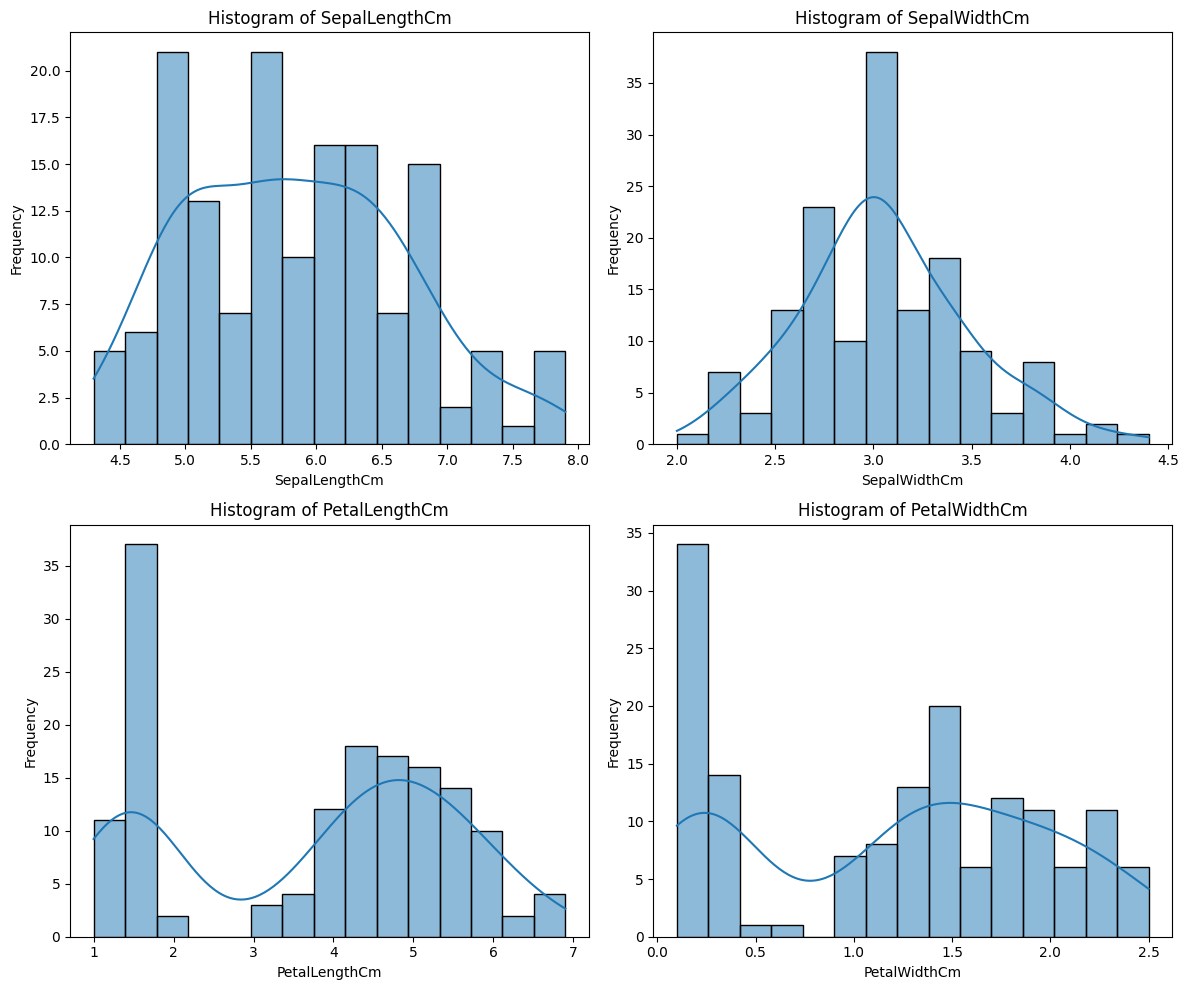

In [4]:
# Plot histograms for each feature
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize=(12, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, bins=15)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

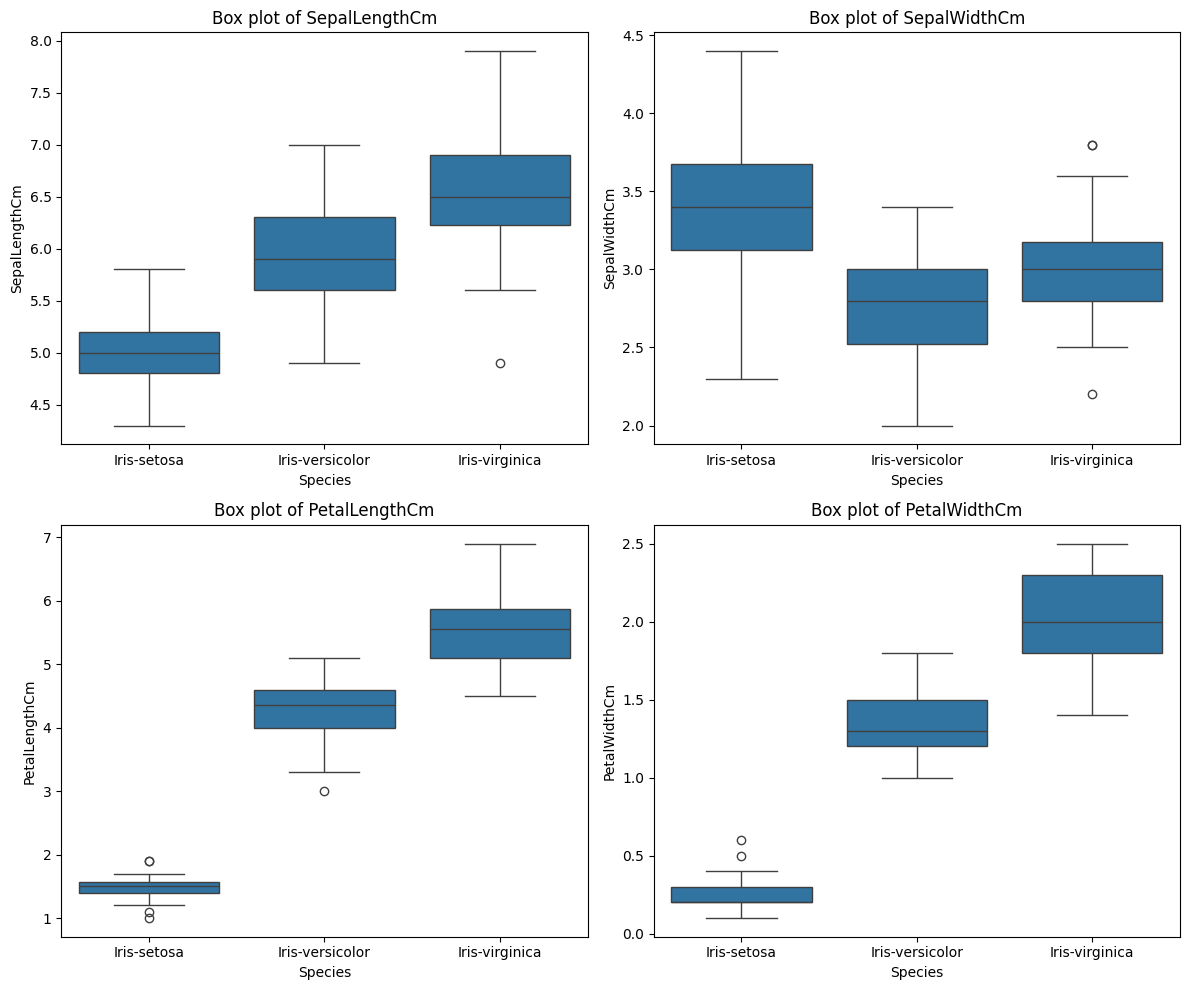

In [5]:
# Plot Boxplot for each feature
plt.figure(figsize=(12, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Species', y=feature, data=df)
    plt.title(f"Box plot of {feature}")
    plt.xlabel("Species")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

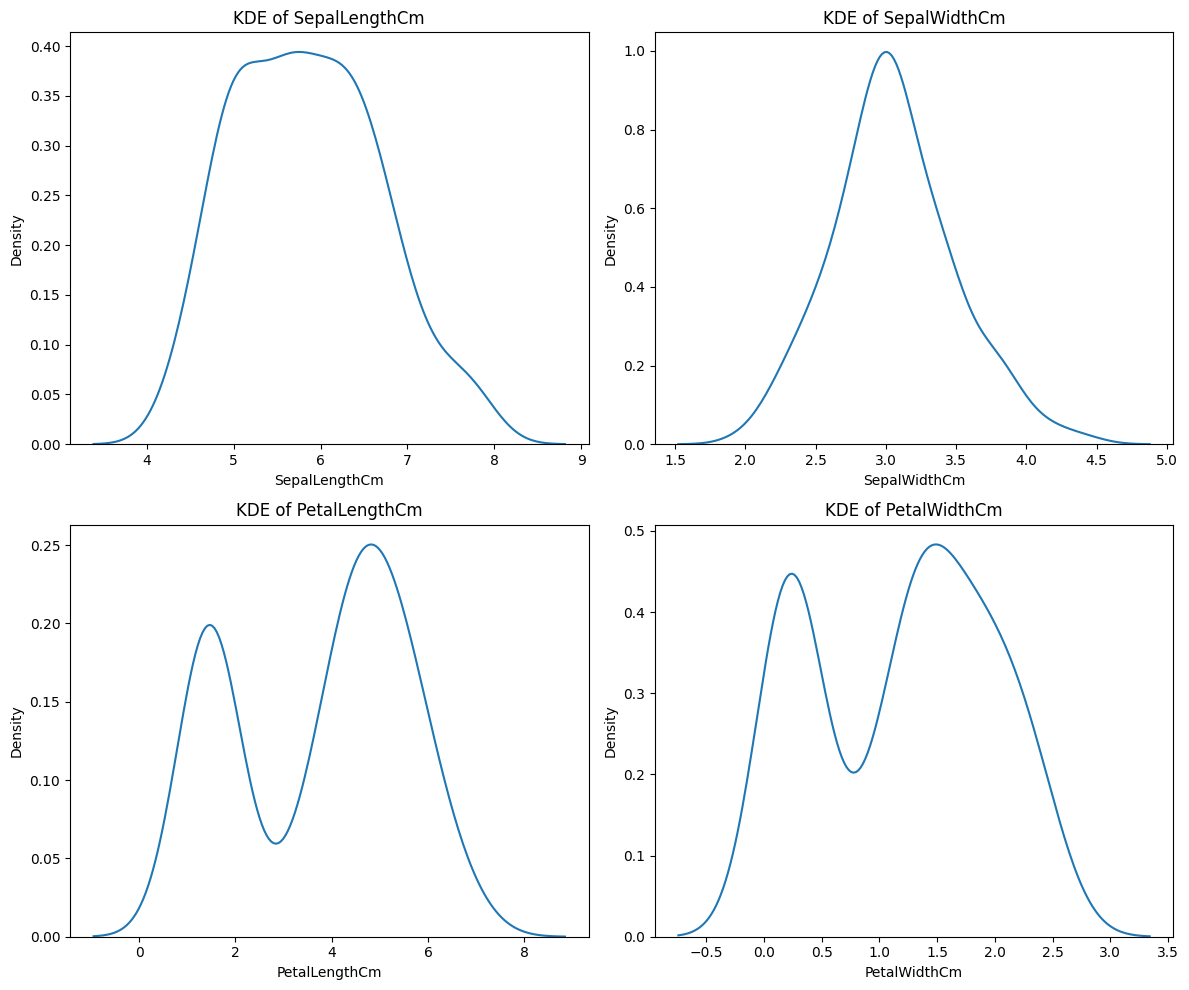

In [6]:
# KDE plot for each feature
plt.figure(figsize=(12, 10))

for feature in features:
    plt.subplot(2, 2, features.index(feature) + 1)
    sns.kdeplot(df[feature])
    plt.title(f"KDE of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

In [7]:
# Identifying Outliers using Z-score:
from scipy.stats import zscore

# Calculate Z-scores
iris_df_z = df[features]
z_scores = zscore(iris_df_z)

# Find outliers: Z-score > 3 or Z-score < -3
outliers_zscore = (z_scores > 3) | (z_scores < -3)

# Get the rows with outliers
outliers_zscore_data = df[outliers_zscore.any(axis=1)]
print(outliers_zscore_data)


    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
15  16            5.7           4.4            1.5           0.4  Iris-setosa


In [8]:
# Identifying Outliers using IQR (Interquartile Range):
# Calculate Q1, Q3, and IQR
import numpy as np
# w1, w3 = np.percentile(df['column_name'], [25, 75])
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1

# Define outliers based on IQR
outliers_iqr = (df[features] < (Q1 - 1.5 * IQR)) | (df[features] > (Q3 + 1.5 * IQR))

# Get the rows with outliers
outliers_iqr_data = df[outliers_iqr.any(axis=1)]
print(outliers_iqr_data)

    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
15  16            5.7           4.4            1.5           0.4   
32  33            5.2           4.1            1.5           0.1   
33  34            5.5           4.2            1.4           0.2   
60  61            5.0           2.0            3.5           1.0   

            Species  
15      Iris-setosa  
32      Iris-setosa  
33      Iris-setosa  
60  Iris-versicolor  


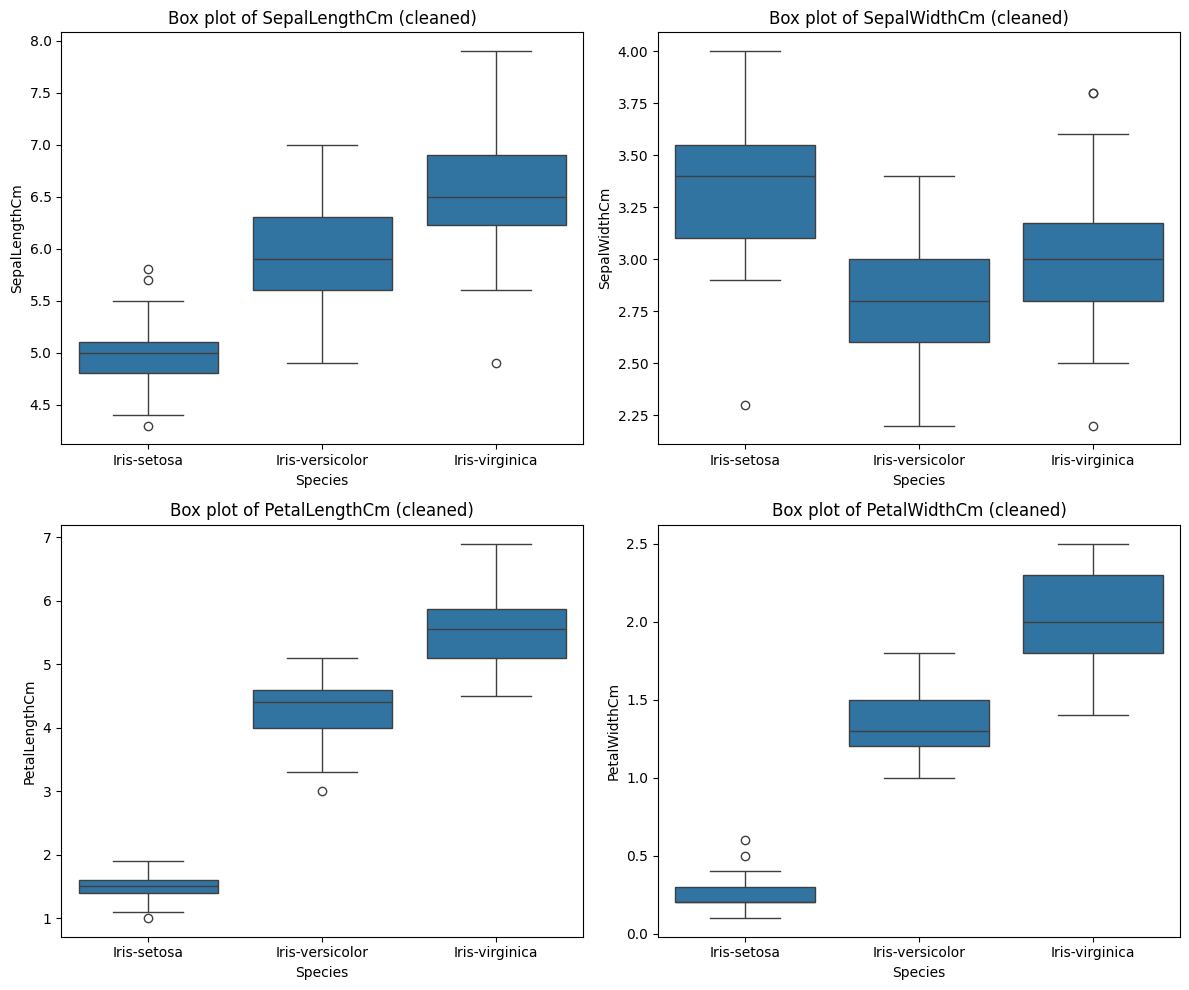

In [9]:
# Remove outliers based on Z-scores
iris_df_cleaned = df[~outliers_iqr.any(axis=1)]

# Visualize the data again after removing outliers
plt.figure(figsize=(12, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Species', y=feature, data=iris_df_cleaned)
    plt.title(f"Box plot of {feature} (cleaned)")
    plt.xlabel("Species")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()